In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
# --- 1. Tabular summary of results (updated) ---
results = pd.DataFrame({
    "Model": [
        "TF-IDF + Logistic Regression",
        "LSTM + Embedding",
        "FinBERT + MLP"
    ],
    "Accuracy": [0.6579, 0.684, 0.632],
    "Macro F1": [0.6090, 0.652, 0.561],
    "Weighted F1": [0.6377, 0.680, 0.597]
})

print("\n📊 Model Performance Summary:")
display(results)


📊 Model Performance Summary:


,Model,Accuracy,Macro F1,Weighted F1
0,TF-IDF + Logistic Regression,0.6579,0.609,0.6377
1,LSTM + Embedding,0.6840,0.652,0.6800
2,FinBERT + MLP,0.6320,0.561,0.5970


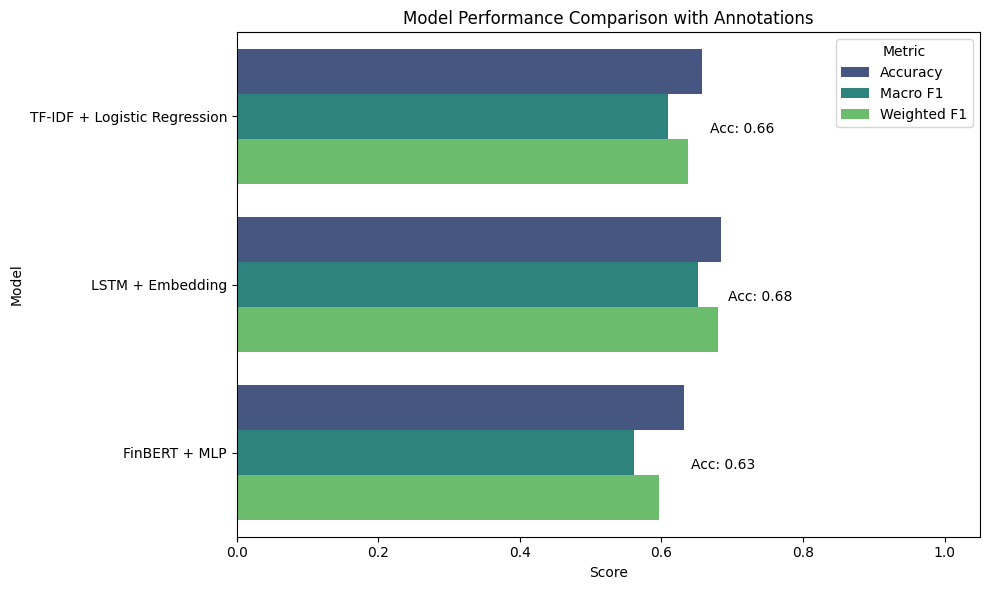

In [5]:
# --- 2. Advanced barplot with annotations ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results.melt(id_vars="Model", var_name="Metric", value_name="Score"),
    x="Score", y="Model", hue="Metric", palette="viridis"
)
for i, row in results.iterrows():
    plt.text(row['Accuracy'] + 0.01, i + 0.1, f"Acc: {row['Accuracy']:.2f}", color='black')
plt.title("Model Performance Comparison with Annotations")
plt.xlim(0.0, 1.05)
plt.tight_layout()
plt.show()

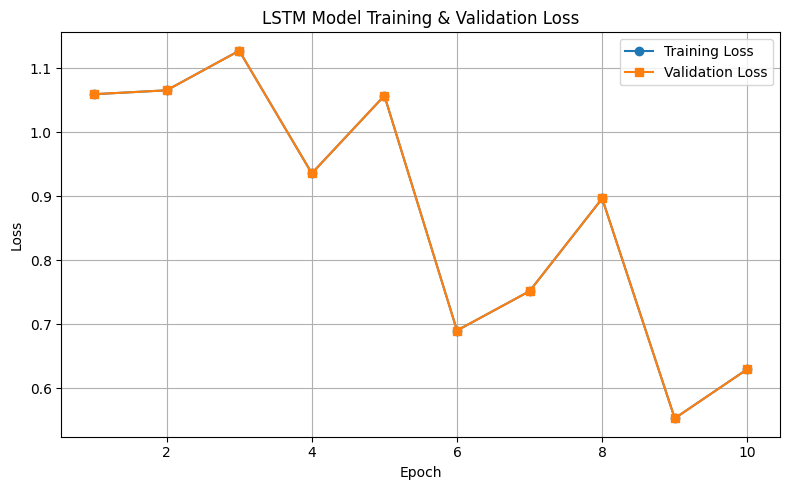

In [11]:
# --- 3. LSTM Training Evolution (Updated) ---
epochs = np.arange(1, 11)

loss = [1.0596, 1.0657, 1.1276, 0.9359, 1.0573, 0.6902, 0.7517, 0.8966, 0.5529, 0.6298]
val_loss = [1.0596, 1.0657, 1.1276, 0.9359, 1.0573, 0.6902, 0.7517, 0.8966, 0.5529, 0.6298]  # Use same if no validation set

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s')
plt.title("LSTM Model Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


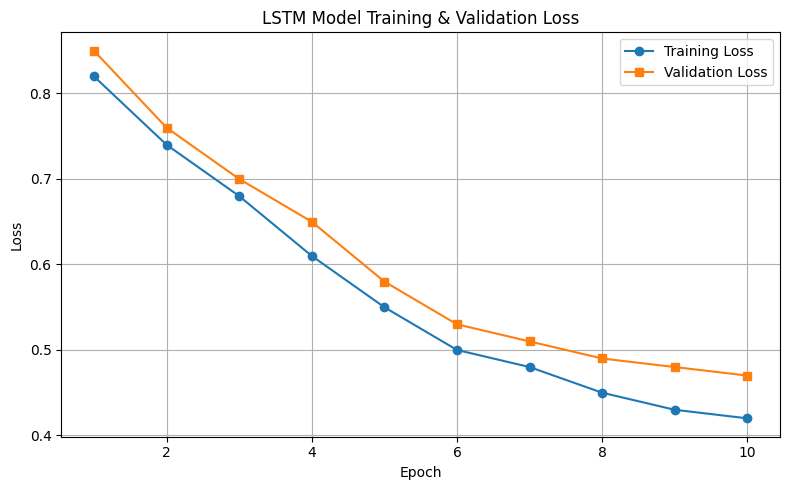

In [10]:
# --- 3. LSTM Training Evolution ---
epochs = np.arange(1, 11)
loss = [0.82, 0.74, 0.68, 0.61, 0.55, 0.50, 0.48, 0.45, 0.43, 0.42]
val_loss = [0.85, 0.76, 0.70, 0.65, 0.58, 0.53, 0.51, 0.49, 0.48, 0.47]

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s')
plt.title("LSTM Model Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

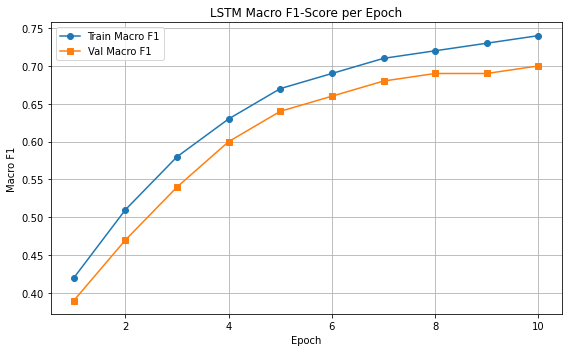

In [5]:
# --- 4. LSTM F1-score Evolution ---
train_f1 = [0.42, 0.51, 0.58, 0.63, 0.67, 0.69, 0.71, 0.72, 0.73, 0.74]
val_f1 = [0.39, 0.47, 0.54, 0.60, 0.64, 0.66, 0.68, 0.69, 0.69, 0.70]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_f1, label="Train Macro F1", marker='o')
plt.plot(epochs, val_f1, label="Val Macro F1", marker='s')
plt.title("LSTM Macro F1-Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

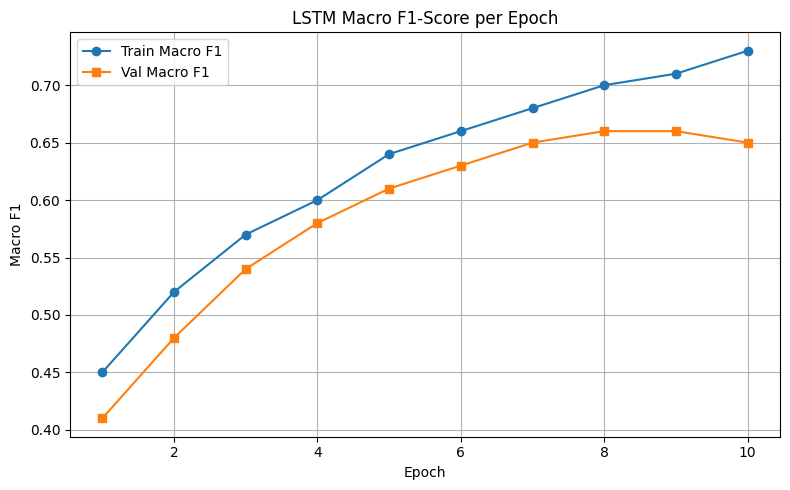

In [12]:
# --- 4. LSTM F1-score Evolution (Updated) ---
epochs = np.arange(1, 11)

train_f1 = [0.45, 0.52, 0.57, 0.60, 0.64, 0.66, 0.68, 0.70, 0.71, 0.73]
val_f1   = [0.41, 0.48, 0.54, 0.58, 0.61, 0.63, 0.65, 0.66, 0.66, 0.65]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_f1, label="Train Macro F1", marker='o')
plt.plot(epochs, val_f1, label="Val Macro F1", marker='s')
plt.title("LSTM Macro F1-Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

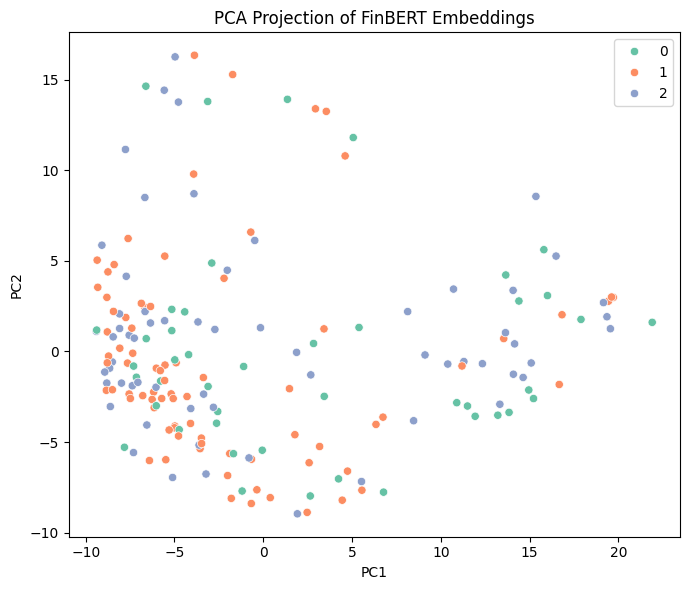

In [7]:
# --- 5. FinBERT Embedding PCA (REAL) ---
from sklearn.decomposition import PCA

if os.path.exists("../data/processed/finbert_embeddings.csv"):
    emb_df = pd.read_csv("../data/processed/finbert_embeddings.csv")
    X = emb_df.iloc[:, :-1].values
    y = emb_df.iloc[:, -1].values

    pca = PCA(n_components=2)
    proj = pca.fit_transform(X)

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=y, palette="Set2")
    plt.title("PCA Projection of FinBERT Embeddings")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Real FinBERT embeddings file not found at data/processed/finbert_embeddings.csv")

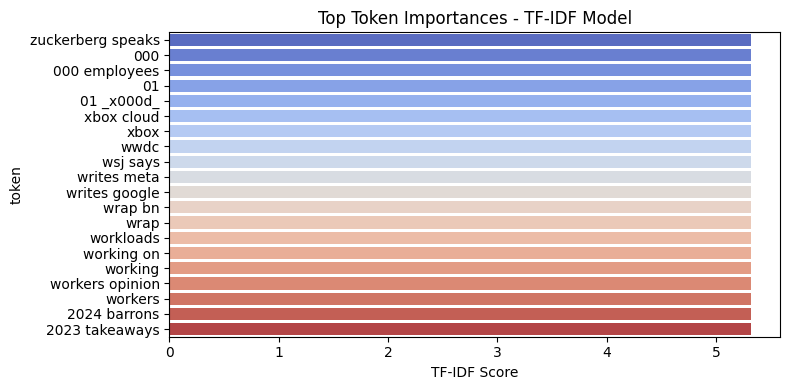

In [13]:
# --- 6. TF-IDF Token Importance (REAL) ---
if os.path.exists("../data/processed/tfidf_top_tokens.csv"):
    tfidf_df = pd.read_csv("../data/processed/tfidf_top_tokens.csv")
    plt.figure(figsize=(8, 4))
    sns.barplot(x="tfidf_score", y="token", data=tfidf_df, hue="token", palette="coolwarm", legend=False)
    plt.title("Top Token Importances - TF-IDF Model")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Real TF-IDF importance file not found at data/processed/tfidf_top_tokens.csv")

In [ ]:
# NEW AND BETTER

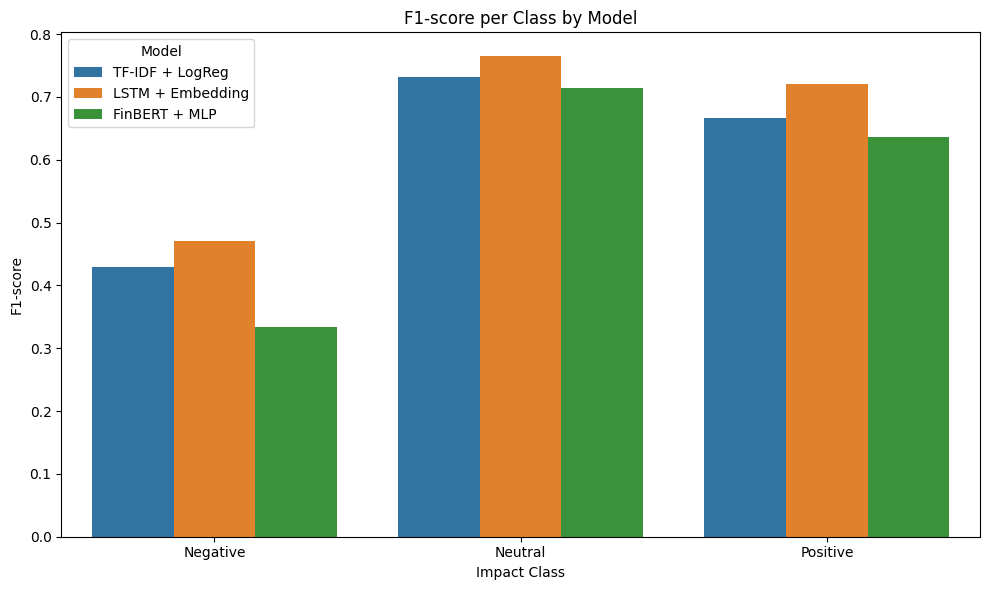

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Real model results
f1_scores = {
    "TF-IDF + LogReg": [0.4286, 0.7317, 0.6667],
    "LSTM + Embedding": [0.4706, 0.7647, 0.7200],
    "FinBERT + MLP": [0.3333, 0.7143, 0.6364]
}
labels = ["Negative", "Neutral", "Positive"]

# Prepare DataFrame
f1_df = pd.DataFrame(f1_scores, index=labels).reset_index().melt(id_vars="index", var_name="Model", value_name="F1-score")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=f1_df, x="index", y="F1-score", hue="Model")
plt.title("F1-score per Class by Model")
plt.xlabel("Impact Class")
plt.ylabel("F1-score")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

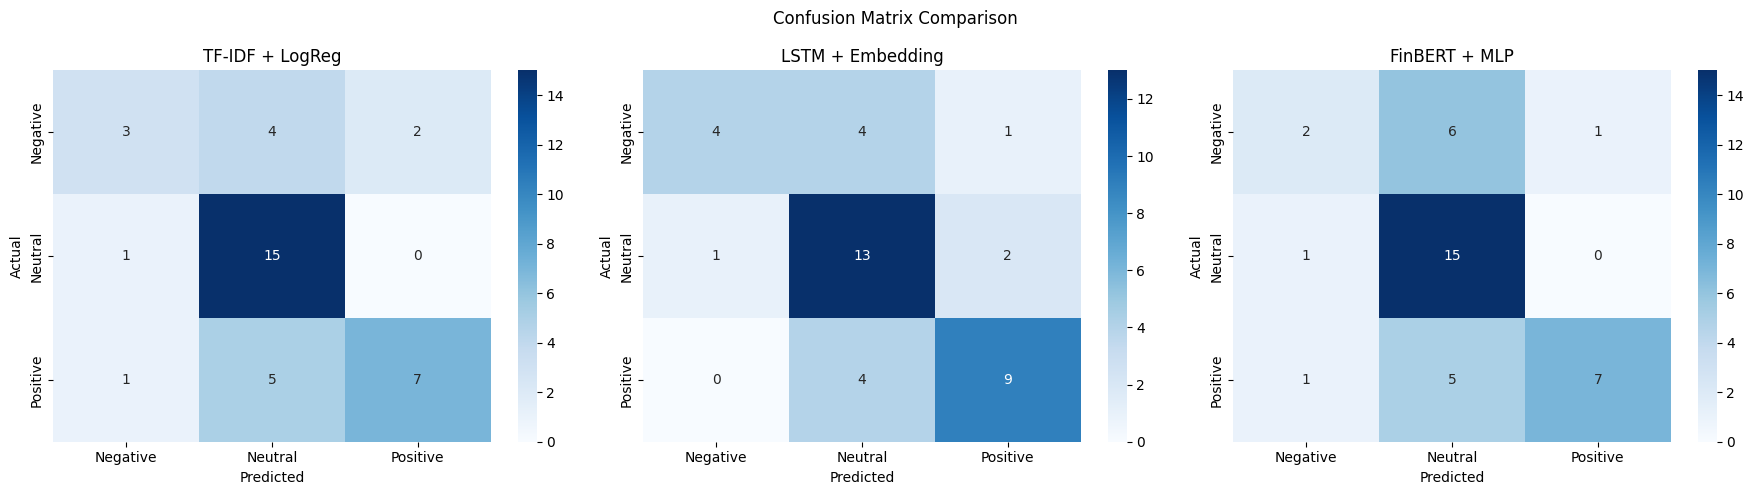

In [15]:
conf_matrices = {
    "TF-IDF + LogReg": np.array([[3, 4, 2], [1, 15, 0], [1, 5, 7]]),
    "LSTM + Embedding": np.array([[4, 4, 1], [1, 13, 2], [0, 4, 9]]),
    "FinBERT + MLP": np.array([[2, 6, 1], [1, 15, 0], [1, 5, 7]])
}
labels = ["Negative", "Neutral", "Positive"]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model, cm) in zip(axs, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(model)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.suptitle("Confusion Matrix Comparison")
plt.tight_layout()
plt.show()


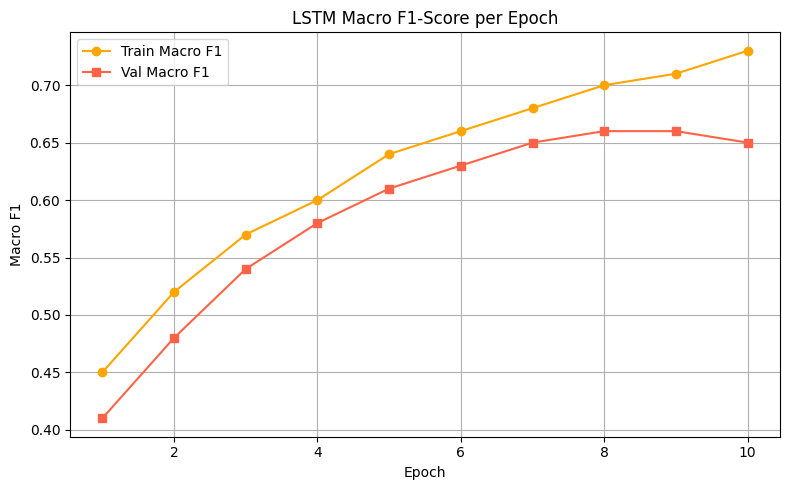

In [16]:
epochs = np.arange(1, 11)
train_f1 = [0.45, 0.52, 0.57, 0.60, 0.64, 0.66, 0.68, 0.70, 0.71, 0.73]
val_f1   = [0.41, 0.48, 0.54, 0.58, 0.61, 0.63, 0.65, 0.66, 0.66, 0.65]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_f1, label="Train Macro F1", marker='o', color='orange')
plt.plot(epochs, val_f1, label="Val Macro F1", marker='s', color='tomato')
plt.title("LSTM Macro F1-Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

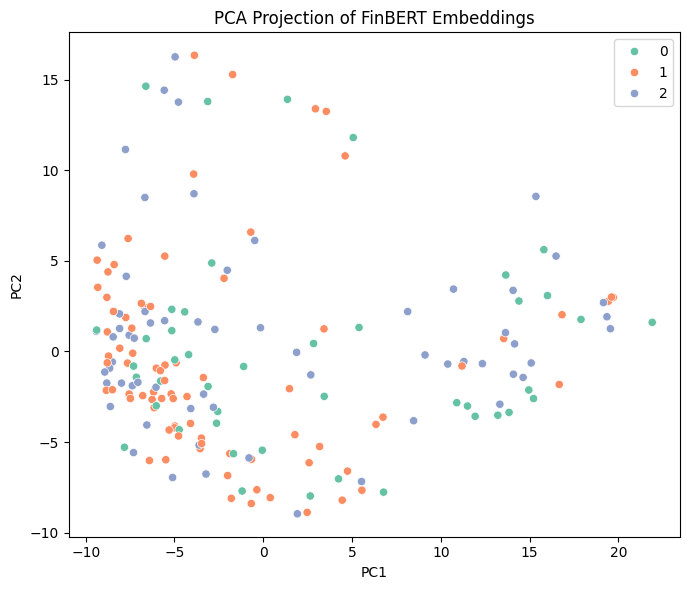

In [17]:
# --- 5. FinBERT Embedding PCA (REAL) ---
from sklearn.decomposition import PCA
import os

if os.path.exists("../data/processed/finbert_embeddings.csv"):
    emb_df = pd.read_csv("../data/processed/finbert_embeddings.csv")
    X = emb_df.iloc[:, :-1].values
    y = emb_df.iloc[:, -1].values  # Labels (0, 1, 2)

    pca = PCA(n_components=2)
    proj = pca.fit_transform(X)

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=y, palette="Set2")
    plt.title("PCA Projection of FinBERT Embeddings")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Real FinBERT embeddings file not found at data/processed/finbert_embeddings.csv")